In [4]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

data = mnist.load_data()

In [5]:
(X_train, y_train), (X_test, y_test) = data

0


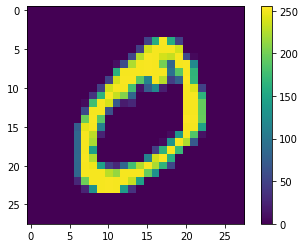

In [13]:
# X_train[0].shape
print(y_train[1])

plt.imshow(X_train[1])
plt.colorbar()

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train = X_train.reshape((X_train.shape[0],28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
from keras.utils import np_utils

print(y_test.shape)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
print(y_test.shape)

(10000,)
(10000, 10)


In [18]:
from keras.models import Sequential
from keras.layers import Dense


In [19]:
model = Sequential()
model.add(Dense(32, input_dim = 28*28, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train, y_train, epochs=15, batch_size=100)

Epoch 1/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0597 - accuracy: 0.9815
Epoch 2/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0536 - accuracy: 0.9835
Epoch 3/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0504 - accuracy: 0.9844
Epoch 4/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0471 - accuracy: 0.9853
Epoch 5/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0437 - accuracy: 0.9864
Epoch 6/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0407 - accuracy: 0.9873
Epoch 7/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0369 - accuracy: 0.9883
Epoch 8/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0338 - accuracy: 0.9896
Epoch 9/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0316 - accuracy: 0.9901
Epoch 10/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0301 - accuracy: 0.9905

In [25]:
scores = model.evaluate(X_test, y_test)
print(scores)

313/313 [==============================] - 0s 992us/step - loss: 0.1303 - accuracy: 0.9693
[0.13027970492839813, 0.9692999720573425]


In [46]:
#Let's Check how well it works

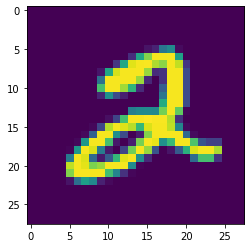

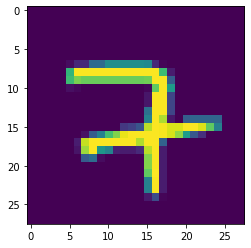

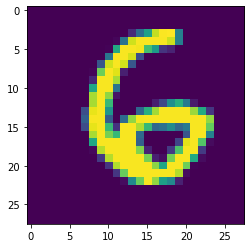

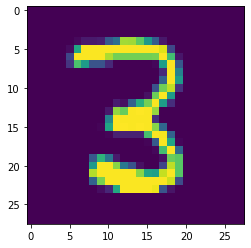

In [43]:
# A few random samples
use_samples = [5, 38, 3939, 27389]
samples_to_predict = []

# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = X_train[sample].reshape((28,28))
  plt.imshow(reshaped_image)
  plt.show()
  # Add sample to array for prediction
  samples_to_predict.append(X_train[sample])

In [47]:
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

(4, 784)


In [48]:
predictions = model.predict(samples_to_predict)
print(predictions)

[[7.7145304e-16 2.6985978e-09 1.0000000e+00 3.0725689e-09 1.3816602e-08
  8.6250633e-12 8.5248086e-19 3.0196241e-09 2.5137211e-08 2.3961751e-17]
 [7.1377400e-15 3.2409179e-08 2.3613884e-05 6.0781442e-09 2.4506077e-09
  3.4237472e-14 9.1957998e-20 9.9997640e-01 3.8700022e-16 3.8607553e-17]
 [5.9948011e-09 1.0434691e-15 1.8928208e-09 2.4903721e-14 1.6583738e-09
  2.9614193e-05 9.9996352e-01 1.7248601e-13 6.9444918e-06 8.4365383e-11]
 [5.7272518e-22 1.0479631e-15 3.3817752e-08 1.0000000e+00 1.3985396e-26
  1.1888583e-10 2.1532895e-26 2.2526004e-13 4.7044993e-11 5.7831618e-17]]


In [54]:
# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)

[2 7 6 3]
